# Relatório de chamados sem OS por mês

In [55]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
#importando csv

df = pd.read_csv("atendimentos_sem_os.csv", ";")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


In [57]:
#transformando o csv em um df pandas

df = df.drop(0).drop(columns='Unnamed: 10')

In [58]:
df.drop(df.tail(1).index,inplace=True) # drop last n rows

In [42]:
df

,Atendimento,Cliente,Abertura,Operador Abertura,Processo,Subprocesso,Finalizado,Finalização,Operador Fecham.,O.S.
1,102189,AUANA DE JESUS SILVA,2022-07-19-09:37:33,carla,Adesão Novo Cliente Fibra,Pós Venda,S,2022-07-19-14:01:25,lucas.mendes,Concluído
2,102194,CEZAR UBALDO DE OLIVEIRA ARAUJO JUNIOR,2022-07-19-10:34:03,michelle,Alteração no Wi-fi,Atualizar cadastro,S,2022-07-19-14:01:51,lucas.mendes,Concluído
3,102184,EVILÁSIA ANA DOS SANTOS,2022-07-19-08:07:34,paraiso,Navegação Lenta FTTH,Navegação Lenta FTTH,S,2022-07-19-10:24:18,paraiso,Concluído
4,102197,MARINALVA LOPES DA SILVA,2022-07-19-12:02:45,carla,Reclamação,Levantamento de motivo,S,2022-07-19-14:01:59,lucas.mendes,Concluído
5,102186,SOLANGE DOS SANTOS ARAUJO,2022-07-19-09:09:20,keize,Conexão Caindo FTTH,Conexão Caindo FTTH,S,2022-07-19-10:38:41,lucas.mendes,Concluído
...,...,...,...,...,...,...,...,...,...,...
396,101670,LAUDICEIA DA CRUZ SANTOS,2022-07-01-16:42:53,jucione,Reclamação,Levantamento de motivo,S,2022-07-04-10:01:07,lucas.mendes,Concluído
397,101659,MARIA CONCEIÇÃO DE JESUS,2022-07-01-14:59:54,SAC,Atendimento Newnet,Vistoria Técnia,S,2022-07-01-16:33:23,keize,Inexistente
398,101667,POSTO DE COMBUSTIVEIS BOM EIRELI,2022-07-01-16:02:24,michelle,Navegação Lenta FTTH,Navegação Lenta FTTH,S,2022-07-01-17:04:43,lucas.mendes,Concluído
399,101647,RONALDO LUIZ OLIVEIRA DA CRUZ,2022-07-01-10:55:25,SAC,Atendimento Newnet,Vistoria Técnia,S,2022-07-01-16:29:37,keize,Inexistente


In [59]:
df['Abertura'] = pd.to_datetime(df['Abertura'])
df['Finalização'] = pd.to_datetime(df['Finalização'])
df['Dia_de_Abertura'] = pd.DatetimeIndex(df['Abertura']).day
df['Dia_de_Fechamento'] = pd.DatetimeIndex(df['Finalização']).day
df['Hora_da_Abertura'] = pd.DatetimeIndex(df['Abertura']).hour
df['Hora_do_Fechamento'] = pd.DatetimeIndex(df['Finalização']).hour

df

,Atendimento,Cliente,Abertura,Operador Abertura,Processo,Subprocesso,Finalizado,Finalização,Operador Fecham.,O.S.,Dia_de_Abertura,Dia_de_Fechamento,Hora_da_Abertura,Hora_do_Fechamento
1,102189,AUANA DE JESUS SILVA,2022-07-19 09:37:33,carla,Adesão Novo Cliente Fibra,Pós Venda,S,2022-07-19 14:01:25,lucas.mendes,Concluído,19,19,9,14
2,102194,CEZAR UBALDO DE OLIVEIRA ARAUJO JUNIOR,2022-07-19 10:34:03,michelle,Alteração no Wi-fi,Atualizar cadastro,S,2022-07-19 14:01:51,lucas.mendes,Concluído,19,19,10,14
3,102184,EVILÁSIA ANA DOS SANTOS,2022-07-19 08:07:34,paraiso,Navegação Lenta FTTH,Navegação Lenta FTTH,S,2022-07-19 10:24:18,paraiso,Concluído,19,19,8,10
4,102197,MARINALVA LOPES DA SILVA,2022-07-19 12:02:45,carla,Reclamação,Levantamento de motivo,S,2022-07-19 14:01:59,lucas.mendes,Concluído,19,19,12,14
5,102186,SOLANGE DOS SANTOS ARAUJO,2022-07-19 09:09:20,keize,Conexão Caindo FTTH,Conexão Caindo FTTH,S,2022-07-19 10:38:41,lucas.mendes,Concluído,19,19,9,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,101670,LAUDICEIA DA CRUZ SANTOS,2022-07-01 16:42:53,jucione,Reclamação,Levantamento de motivo,S,2022-07-04 10:01:07,lucas.mendes,Concluído,1,4,16,10
397,101659,MARIA CONCEIÇÃO DE JESUS,2022-07-01 14:59:54,SAC,Atendimento Newnet,Vistoria Técnia,S,2022-07-01 16:33:23,keize,Inexistente,1,1,14,16
398,101667,POSTO DE COMBUSTIVEIS BOM EIRELI,2022-07-01 16:02:24,michelle,Navegação Lenta FTTH,Navegação Lenta FTTH,S,2022-07-01 17:04:43,lucas.mendes,Concluído,1,1,16,17
399,101647,RONALDO LUIZ OLIVEIRA DA CRUZ,2022-07-01 10:55:25,SAC,Atendimento Newnet,Vistoria Técnia,S,2022-07-01 16:29:37,keize,Inexistente,1,1,10,16


In [60]:
df.value_counts('Dia_de_Abertura')

Dia_de_Abertura
11    45
5     42
13    37
6     36
4     32
14    29
12    28
15    23
8     23
18    22
1     20
7     20
9     14
16    14
19     5
2      4
3      3
17     2
10     1
dtype: int64

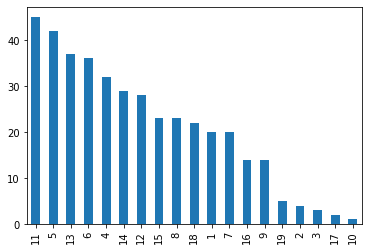

In [45]:
df.Dia_de_Abertura.value_counts().plot(kind='bar')

In [ ]:
conditions = [
              (df['Hora_da_Abertura'] >= 6) & (df['Hora_da_Abertura'] < 12),
              (df['Hora_da_Abertura'] >= 12) & (df['Hora_da_Abertura'] < 18),
              (df['Hora_da_Abertura'] >= 18) & (df['Hora_da_Abertura'] < 6) 
]

values = ['manha', 'tarde', 'noite']

df['turno_abertura'] = np.select(conditions, values)

conditions_fechamento = [
              (df['Hora_do_Fechamento'] >= 6) & (df['Hora_do_Fechamento'] < 12),
              (df['Hora_do_Fechamento'] >= 12) & (df['Hora_do_Fechamento'] < 18),
              (df['Hora_do_Fechamento'] >= 18) & (df['Hora_do_Fechamento'] < 6) 
]

values_fechamento = ['manha', 'tarde', 'noite']

df['turno_fechamento'] = np.select(conditions_fechamento, values_fechamento)
df.head()

In [66]:
print(df.value_counts('turno_abertura'))
print(df.value_counts('turno_fechamento'))

turno_abertura
tarde    199
manha    181
0         20
dtype: int64
turno_fechamento
manha    206
tarde    188
0          6
dtype: int64


In [67]:
df_cp = df

In [74]:
df_cp

,Cliente,Operador Abertura,Processo,Subprocesso,Finalizado,Operador Fecham.,O.S.,Dia_de_Abertura,Dia_de_Fechamento,turno_abertura,turno_fechamento
1,AUANA DE JESUS SILVA,carla,Adesão Novo Cliente Fibra,Pós Venda,S,lucas.mendes,Concluído,19,19,manha,tarde
2,CEZAR UBALDO DE OLIVEIRA ARAUJO JUNIOR,michelle,Alteração no Wi-fi,Atualizar cadastro,S,lucas.mendes,Concluído,19,19,manha,tarde
3,EVILÁSIA ANA DOS SANTOS,paraiso,Navegação Lenta FTTH,Navegação Lenta FTTH,S,paraiso,Concluído,19,19,manha,manha
4,MARINALVA LOPES DA SILVA,carla,Reclamação,Levantamento de motivo,S,lucas.mendes,Concluído,19,19,tarde,tarde
5,SOLANGE DOS SANTOS ARAUJO,keize,Conexão Caindo FTTH,Conexão Caindo FTTH,S,lucas.mendes,Concluído,19,19,manha,manha
...,...,...,...,...,...,...,...,...,...,...,...
396,LAUDICEIA DA CRUZ SANTOS,jucione,Reclamação,Levantamento de motivo,S,lucas.mendes,Concluído,1,4,tarde,manha
397,MARIA CONCEIÇÃO DE JESUS,SAC,Atendimento Newnet,Vistoria Técnia,S,keize,Inexistente,1,1,tarde,tarde
398,POSTO DE COMBUSTIVEIS BOM EIRELI,michelle,Navegação Lenta FTTH,Navegação Lenta FTTH,S,lucas.mendes,Concluído,1,1,tarde,tarde
399,RONALDO LUIZ OLIVEIRA DA CRUZ,SAC,Atendimento Newnet,Vistoria Técnia,S,keize,Inexistente,1,1,manha,tarde


In [72]:
df_cp = df_cp.drop(columns=['Atendimento', 'Abertura', 'Finalização', 'Hora_da_Abertura', 'Hora_do_Fechamento'])